In [1]:
import os
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
path = "c:/Python27/qp2_py/frechet_distance/current_results/"
allFiles = os.listdir(path)
for name in allFiles:
    fname = path+name
    distances = pd.read_csv(fname, sep="_", header=None)
#print distances

In [3]:
distances.columns= ["speakerID", "speakerIPU", "comp_speaker", "comp_speakerIPU","frechetdistance"]

In [ ]:
## write out to CSV (Done, 5/2)
distances

### Import labels because that's important

In [4]:
labels = pd.read_csv("c:/Python27/qp2_py/labels/labels41_onlyqs.csv")

In [ ]:
print labels

In [ ]:
labels.iloc[0]["Language"]

df.index = df.Year
df.loc[1913:1914]

In [5]:
#### this is for speakers and isn't broken I don't think
from collections import defaultdict
speakersID = defaultdict(lambda:{})
speakerLabel = defaultdict(str)
for item in labels.iterrows():
    speaker = item[0]
    language = item[1]["Language"]
    if speaker not in speakersID.keys():
        speakersID[speaker]=language


In [33]:
print speakersID.items()

[(0, 'English'), (1, 'English'), (2, 'English'), (3, 'English'), (4, 'Mandarin'), (5, 'Mandarin'), (6, 'Mandarin'), (7, 'Mandarin'), (8, 'English'), (9, 'Mandarin'), (10, 'English'), (11, 'English'), (12, 'English'), (13, 'English'), (14, 'Mandarin'), (15, 'English'), (16, 'English'), (17, 'English'), (18, 'Mandarin'), (19, 'English'), (20, 'English'), (21, 'English'), (22, 'English'), (23, 'Mandarin'), (24, 'English'), (25, 'Mandarin'), (26, 'Mandarin'), (27, 'Mandarin'), (28, 'Mandarin'), (29, 'Mandarin'), (30, 'Mandarin'), (31, 'Mandarin'), (32, 'Mandarin'), (33, 'Mandarin'), (34, 'Mandarin'), (35, 'Mandarin'), (36, 'Mandarin'), (37, 'Mandarin'), (38, 'Mandarin'), (39, 'Mandarin'), (40, 'English')]


In [ ]:
speakersID[0]

In [6]:
#while speaker1 is the same, check IPU
#get ipu language and add it to a list
#### 

first_speak = []
compare_speak = []

for item in distances.iterrows():
    sID = item[1]["speakerID"]
    compID = item[1]["comp_speaker"]
    lang1 = speakersID[sID]
    lang2 = speakersID[compID]
    first_speak.append(lang1)
    compare_speak.append(lang2)
        

        
    
    
    

In [7]:
distances["speaker1_lang"] = first_speak
distances["comp_lang"] = compare_speak

In [8]:
distances

,speakerID,speakerIPU,comp_speaker,comp_speakerIPU,frechetdistance,speaker1_lang,comp_lang
0,0,0,1,0,65.249969,English,English
1,0,0,1,1,66.515404,English,English
2,0,0,1,2,274.112701,English,English
3,0,0,1,3,84.120514,English,English
4,0,0,1,4,157.210114,English,English
5,0,0,1,5,79.410965,English,English
6,0,0,1,6,66.920204,English,English
7,0,0,1,7,129.865005,English,English
8,0,0,1,8,87.305168,English,English
9,0,0,1,9,70.002014,English,English


In [9]:
distances.keys()

Index([u'speakerID', u'speakerIPU', u'comp_speaker', u'comp_speakerIPU',
       u'frechetdistance', u'speaker1_lang', u'comp_lang'],
      dtype='object')

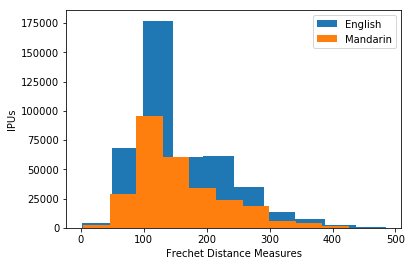

In [32]:
%matplotlib inline
fig, ax = plt.subplots()
lg = distances.groupby(by="speaker1_lang")
for lang, sub_group in lg:
    ax.hist(sub_group["frechetdistance"],label=lang)
ax.set_xlabel("Frechet Distance Measures")
ax.set_ylabel("IPUs")
ax.legend()

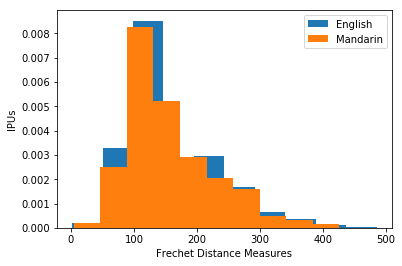

In [33]:
%matplotlib inline
fig, ax = plt.subplots()
lg = distances.groupby(by="speaker1_lang")
for lang, sub_group in lg:
    ax.hist(sub_group["frechetdistance"],label=lang, normed=True)
ax.set_xlabel("Frechet Distance Measures")
ax.set_ylabel("IPUs")
ax.legend()


- Uneven number of Eng & Man speakers (first graph shows that)
- Trying to compare the distances - it doesn't actually care, it looks of the vectors
- Graph 2 is the probability of the IPU being in each bin - on average, this is what the typical IPU vectors look like
- Visualization of why the ttests won't show anything 

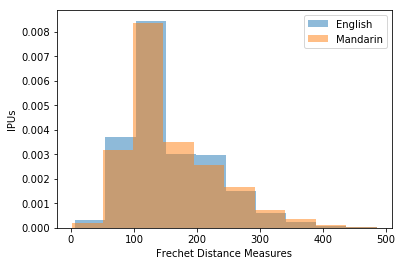

In [39]:
%matplotlib inline
fig, ax = plt.subplots()
lg = distances.groupby(by="comp_lang")
for lang, sub_group in lg:
    ax.hist(sub_group["frechetdistance"],label=lang, normed=True, alpha=0.5)
ax.set_xlabel("Frechet Distance Measures")
ax.set_ylabel("IPUs")
ax.legend()

In [35]:
lg = distances.groupby(by="comp_lang")

Mandarin    517616
English     186876
Name: comp_lang, dtype: int64

In [82]:
plt.subplots?

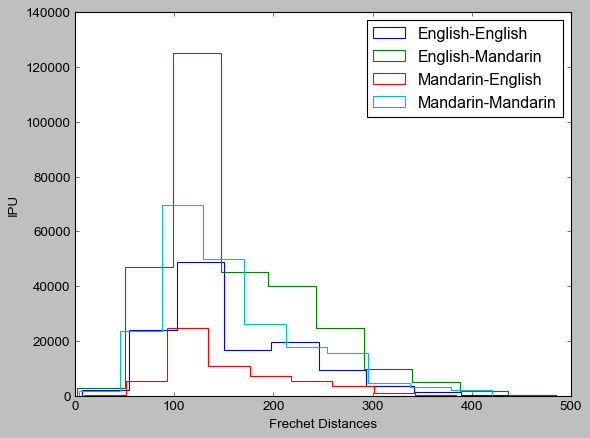

In [88]:
with plt.style.context("classic"): 
    fig, ax = plt.subplots()
    grouped = distances.groupby(by =["speaker1_lang", "comp_lang"])
    for (sl, cl), sub_group in grouped:
        ax.hist(sub_group["frechetdistance"],label="{}-{}".format(sl,cl), 
            normed=False, histtype="step")
    ax.set_xlabel("Frechet Distances")
    ax.set_ylabel("IPU")

    ax.legend()
    

- Why is there this bump (English v Mandarin) that isn't really the same as Mandarin-English?  I want a better explanation for this.  
- Email Hannah to ask her about this.

In [ ]:
g = sns.clustermap(, cbar_kws={'cmap':cmap, 'norm':norm}, 
                   xticklabels=IDtoLabel.values(), yticklabels = IDtoLabel.values())

In [ ]:
lg = distances.groupby

### Statistics for Martin

In [37]:
eng_dist = []
man_dist = []
grand = []
for item in distances.iterrows():
    s1 = item[1]["speaker1_lang"]
    s2 = item[1]["comp_lang"]
    dist = item[1]["frechetdistance"]
    if s1 == "English" and s2 == "English":
        eng_dist.append(dist)
    elif s1 =="Mandarin" and s2 =="Mandarin":
        man_dist.append(dist)
    grand.append(dist)

In [ ]:
print len(eng_dist)
print len(man_dist)
print len(grand)

In [ ]:
eng_avg = float(sum(eng_dist))/len(eng_dist)
man_avg = float(sum(man_dist))/len(man_dist)
grand_avg = float(sum(grand))/len(grand)

In [ ]:
#### nothing is significant.  At all.  Nothing.  
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
out = ttest_ind(eng_dist, man_dist)
#out = mannwhitneyu(man_avg, grand_avg)
print out

### If we are sorting things, do it here.

In [ ]:
#dist2 = distances.groupby(["speaker1_lang"])
dist_sorted = distances.sort_values(by=["speaker1_lang", "speakerID"])

In [ ]:
dist_sorted

In [ ]:
### write this out once so we don't have to worry about losing it

#distances.to_csv("C:/Users/Rachel/Documents/Grad_Stuff/QP2/feature_vecs/distances_with_labels.csv")

In [5]:
###### I fixed it!  I fixed something!!!
## Make a big dictionary of speaker IDs and labels
from collections import defaultdict
ipuID = defaultdict(lambda:{})
IDtoLabel = defaultdict(str)
count = 0
for item in distances.iterrows():
    speakerID =  item[1]["speakerID"]
    speakerIPU = item[1]["speakerIPU"]
    speakerID = int(speakerID)
    speakerIPU = int(speakerIPU)
    if speakerIPU not in ipuID[speakerID]:
        ipuID[speakerID][speakerIPU]=count
        IDtoLabel[count] = labels.iloc[speakerID][0]
        count +=1

In [ ]:
###### Modified for the alphabetical sorted distance matrix?
## Make a big dictionary of speaker IDs and labels
## absolutely no idea if this is useful or necessary
from collections import defaultdict
ipuID = defaultdict(lambda:{})
IDtoLabel = defaultdict(str)
count = 0
for item in dist_sorted.iterrows():
    speakerID =  item[1]["speakerID"]
    speakerIPU = item[1]["speakerIPU"]
    speakerID = int(speakerID)
    speakerIPU = int(speakerIPU)
    if speakerIPU not in ipuID[speakerID]:
        ipuID[speakerID][speakerIPU]=count
        IDtoLabel[count] = labels.iloc[speakerID][0]
        count +=1

In [ ]:
print IDtoLabel.items()

In [ ]:
count

In [ ]:
count**2

In [ ]:
###labels.iloc[speakID]["Language"]

In [6]:
dist_matrix = np.zeros([count,count])

In [ ]:
dist_matrix

In [7]:
for item in distances.iterrows():
    speakerID = item[1]["speakerID"]
    speakerIPU = item[1]["speakerIPU"]
    compared_speaker = item[1]["comp_speaker"]
    compared_IPU = item[1]["comp_speakerIPU"]
    distance = item[1]["frechetdistance"]
    if compared_IPU in ipuID[compared_speaker]:
        id1 = ipuID[speakerID][speakerIPU]
        id2 = ipuID[compared_speaker][compared_IPU]
        dist_matrix[id1,id2] = distance

In [ ]:
#### skip because this is probably broken
for item in dist_sorted.iterrows():
    speakerID = item[1]["speakerID"]
    speakerIPU = item[1]["speakerIPU"]
    compared_speaker = item[1]["comp_speaker"]
    compared_IPU = item[1]["comp_speakerIPU"]
    distance = item[1]["frechetdistance"]
    if compared_IPU in ipuID[compared_speaker]:
        id1 = ipuID[speakerID][speakerIPU]
        id2 = ipuID[compared_speaker][compared_IPU]
        dist_matrix[id1,id2] = distance

In [ ]:
dist_matrix

In [ ]:
dist_matrix.argmax()

In [ ]:
#### In case this was the transform, which if def is not
dist2 == dist_matrix.T

### In which I try to fill the rest of these zeroes with the inverse?

In [ ]:
print len(dist_matrix)
print len(dist_matrix[0])

In [8]:
dist2 = dist_matrix
#dist2 = distances_train

In [9]:
for i in range(len(dist_matrix)):
    for j in range(len(dist_matrix[0])):
        dist2[j][i]=dist_matrix[i][j]

In [ ]:
dist2

In [10]:
dist_matrix

array([[  0.      ,   0.      ,   0.      , ...,  69.01545 ,  67.204994,
         59.195515],
       [  0.      ,   0.      ,   0.      , ...,  84.960052,  84.960075,
         84.960602],
       [  0.      ,   0.      ,   0.      , ...,  61.030792,  55.655983,
         54.380981],
       ..., 
       [ 69.01545 ,  84.960052,  61.030792, ...,   0.      ,   0.      ,
          0.      ],
       [ 67.204994,  84.960075,  55.655983, ...,   0.      ,   0.      ,
          0.      ],
       [ 59.195515,  84.960602,  54.380981, ...,   0.      ,   0.      ,
          0.      ]])

### Seaborn dendromapping of some kind

In [30]:
IDtoLabel.values()

['English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'English',
 'En

<IPython.core.display.Javascript object>


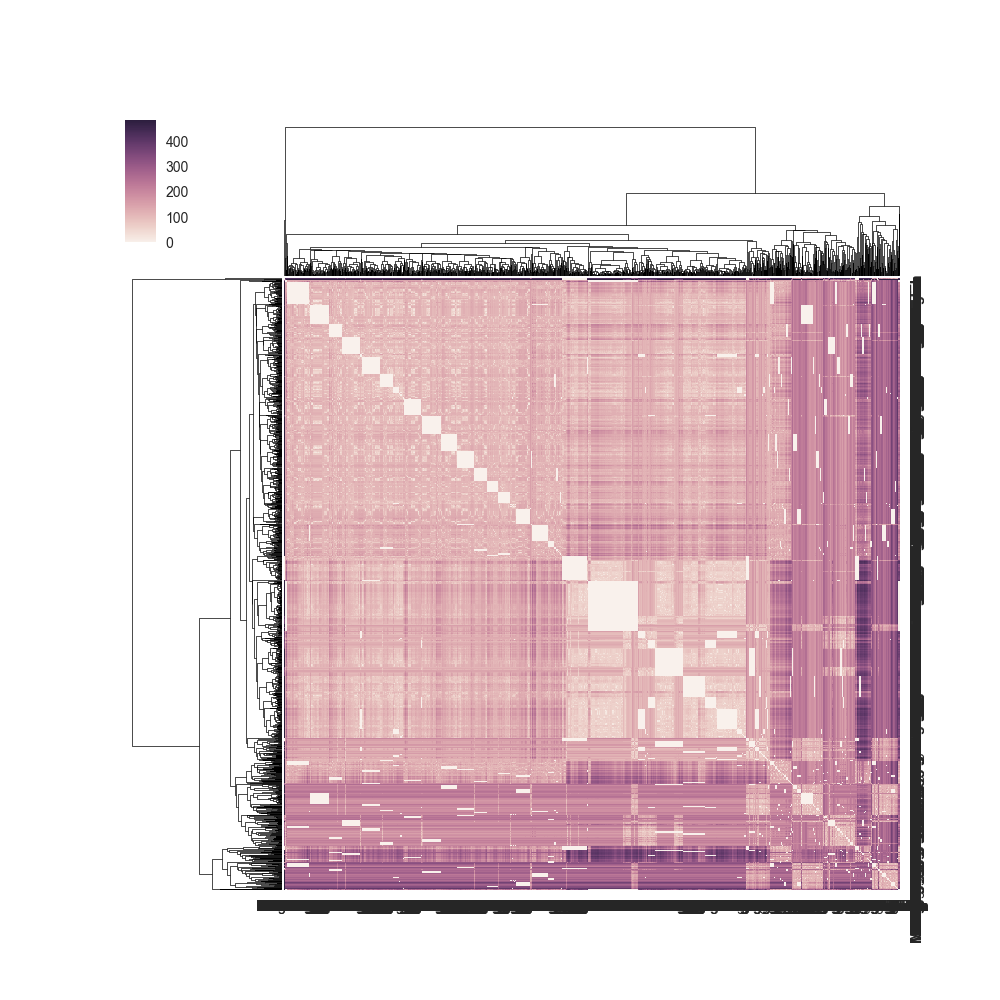

C:\Users\Rachel\AppData\Local\Continuum\Anaconda2\lib\site-packages\seaborn\matrix.py:143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if xticklabels == []:
C:\Users\Rachel\AppData\Local\Continuum\Anaconda2\lib\site-packages\seaborn\matrix.py:151: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if yticklabels == []:


In [31]:
import seaborn as sns; sns.set()
import matplotlib.cm as mcm
import matplotlib.colors as mcolors

bins = np.arange(0,500,50)
bins[0] = dist_matrix[dist_matrix>0].min()
cmap = mcm.Set1
#cmap = mcm.prism
norm = mcolors.BoundaryNorm(bins, cmap.N)
cmap.set_under("White")

g = sns.clustermap(dist_matrix, cbar_kws={'cmap':cmap, 'norm':norm}, 
                   xticklabels=IDtoLabel.values(), yticklabels = IDtoLabel.values())



### And now, we try sklearn agglomerative clustering with dendrograms to try to get SOMETHING out of this data

5/2/17:  This doesn't work, either.  We need an n clusters to look for, and I don't have that, and also I have too much data.

<IPython.core.display.Javascript object>


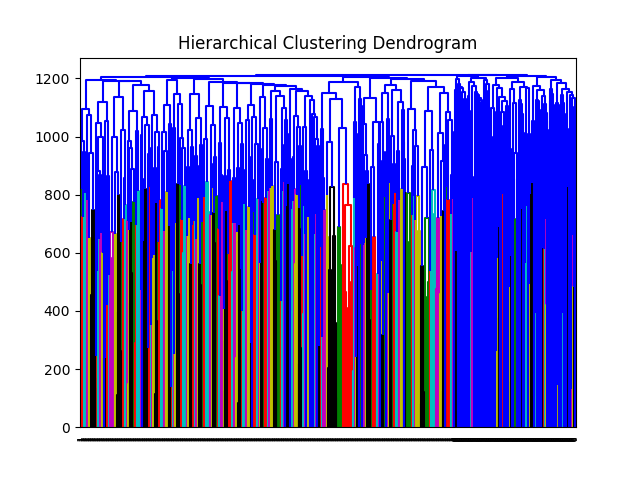

In [13]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import scipy.spatial.distance as ssd

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



#con_matrix = ssd.squareform(dist_matrix)
#### agglomerative clustering won't work because I don't know how many clusters it should be - it's too supervised.
model = AgglomerativeClustering(n_clusters=2)


model = model.fit(dist_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, labels=model.labels_)
plt.show()

### In which we try dendrogram heirerachical clustering, because people claim it's better.

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation
from scipy.cluster.hierarchy import fcluster
import scipy.spatial.distance as ssd

In [15]:
### need to condense this into a square matrix, which is it? I don't even know.
con_matrix = ssd.squareform(dist_matrix)


In [16]:
assignments = fcluster(linkage(con_matrix, method='complete'),4,'distance')

print assignments


[ 1  1  1 ..., 20 20 20]


In [17]:
np.unique(assignments)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40])

In [18]:
cluster_output = pd.DataFrame({'IPU':IDtoLabel.items() , 'cluster':assignments})

In [19]:
cluster_output

,IPU,cluster
0,"(0, English)",1
1,"(1, English)",1
2,"(2, English)",1
3,"(3, English)",1
4,"(4, English)",1
5,"(5, English)",1
6,"(6, English)",1
7,"(7, English)",1
8,"(8, English)",1
9,"(9, English)",1


<IPython.core.display.Javascript object>


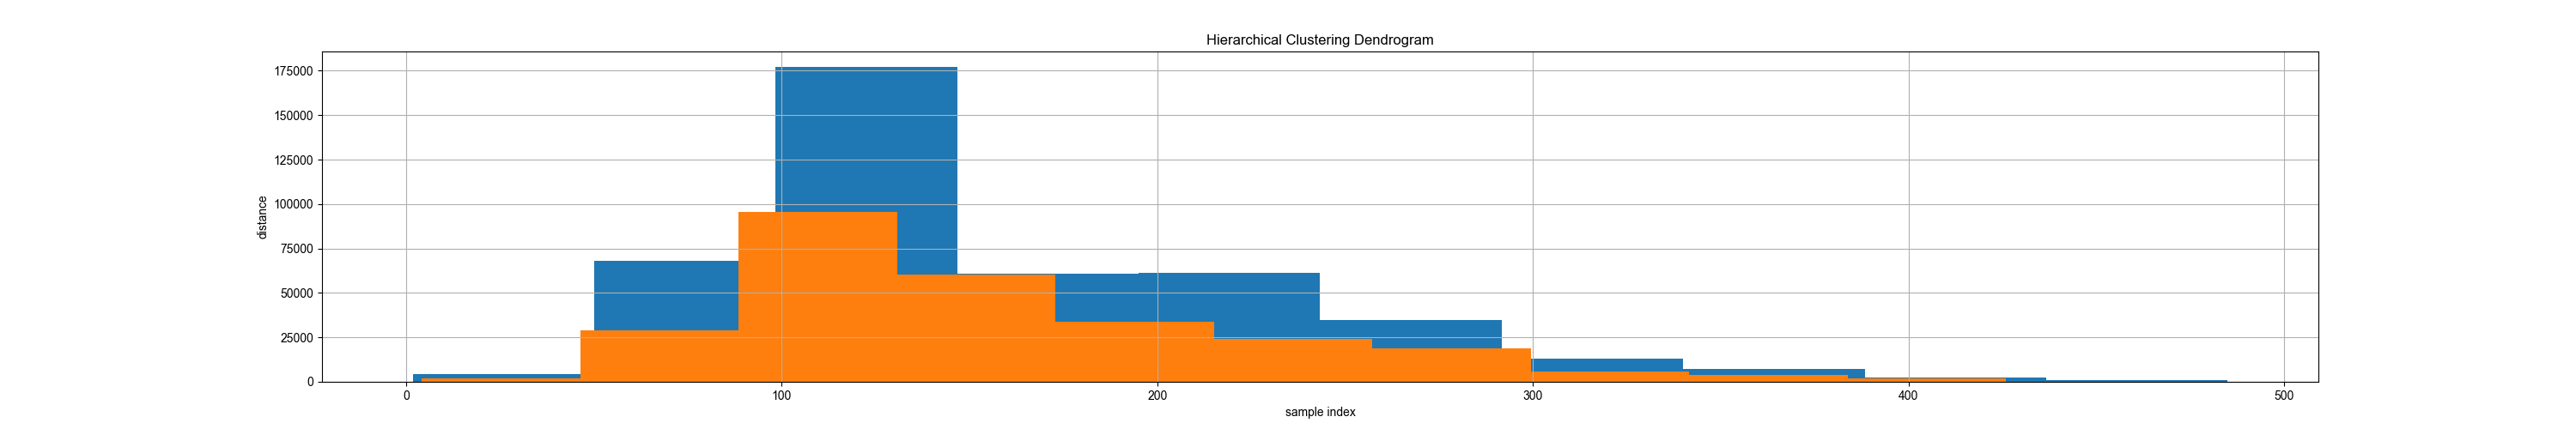

TypeError: Linkage matrix 'Z' must contain doubles.

In [20]:
##### this doesn't work because assignments doesn't contain "doubles"?

fig, ax = plt.subplots(figsize=(30, 5))
ax.set_title('Hierarchical Clustering Dendrogram')
ax.set_xlabel('sample index')
ax.set_ylabel('distance')
dendrogram(
    assignments,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    ax=ax
)
#ax.set_xticks([])
xticklabs = ax.get_xticklabels()
ax.set_xticklabels([t.get_text() for t in xticklabs], rotation=90)
plt.show()

### Dendrograms I tried on my own (also don't work)

In [ ]:
Z = linkage(con_matrix, 'ward')

In [ ]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(dist_matrix))
c



In [ ]:
len(Z)

In [ ]:
Z[:30]

In [ ]:
fig, ax = plt.subplots(figsize=(30, 5))
ax.set_title('Hierarchical Clustering Dendrogram')
ax.set_xlabel('sample index')
ax.set_ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    ax=ax
)
#ax.set_xticks([])
xticklabs = ax.get_xticklabels()
ax.set_xticklabels([t.get_text() for t in xticklabs], rotation=90)
plt.show()

In [ ]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [ ]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [ ]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.show()

In [ ]:
from scipy.cluster.hierarchy import fcluster

labels=fcluster(Z, t=Z.min())



In [ ]:
labels

In [ ]:
np.unique(labels)

In [ ]:
print Z[:20]

In [ ]:
len(clusters)

In [ ]:
k=4
fcluster(Z, k, criterion='maxclust')



In [ ]:
len(clusters)

In [ ]:
plt.figure(figsize=(10, 8))
#plt.scatter(dist_matrix[:,0], dist_matrix[:,1], c=clusters, cmap='viridis')  # plot points with cluster dependent colors
plt.scatter(dist_matrix[:,0], dist_matrix[:,1], c=clusters, cmap='prism')
plt.show()

It's weird.  With dendrogram heirerchical clustering, it looks more promising.  At the very least, seperable.  But I really don't know how to interpret these clusters, or have any idea what they mean.  And how can I tell how useful they are without labels attached?

In [ ]:
#### why is this just printing out gibberish?  I would 
#np.save("c:/Python27/qp2_py/frechet_distance/dist_matrix_1207.txt", dist_matrix, allow_pickle=False)
np.savetxt("c:/Python27/qp2_py/frechet_distance/dist_matrix_1207.txt", dist_matrix)

infile = open("c:/Python27/qp2_py/frechet_distance/half_matrix.txt", "r")
in_matrix = np.load(infile)

### This one time I tried scaling and that was a bad idea

In [ ]:
#infile = open("c:/Python27/qp2_py/frechet_distance/half_matrix.txt", "r")
#in_matrix = np.load(infile)

In [ ]:
#in_matrix

In [ ]:
##### try scaling from the book, to make the matrix more compact- results in a single cluster, which is no good
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dist_matrix)
dist_scaled = scaler.transform(dist_matrix)

In [ ]:
dist_scaled

In [ ]:
## 4/26 retry with assistence from The Book
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 2.0, metric="precomputed")
clusters = dbscan.fit_predict(dist_matrix)

In [ ]:
print format(clusters)

In [ ]:
### for Book format only
cluster_labels = clusters

In [ ]:
import matplotlib.cm as mcm
plt.scatter(dist_matrix[:,0], dist_matrix[:1], c=clusters, cmap = mcm.viridis)

In [ ]:
import matplotlib.cm as mcm
plt.scatter(dist_scaled[:,0], dist_scaled[:1], c=clusters, cmap = mcm.viridis)

### Clustering, as we've been doing

In [ ]:
from sklearn.cluster import DBSCAN

cluster = DBSCAN(eps = 2.0, metric="precomputed")
cluster.fit(dist_matrix)

In [ ]:
dist_matrix

### Just visualize the distance matrix on its own...

(array([  77513.,  205502.,  581182.,  228776.,  186986.,  110102.,
          49140.,   22776.,    7448.,    1944.]),
 array([   0.   ,   48.497,   96.994,  145.491,  193.988,  242.485,
         290.982,  339.479,  387.976,  436.473,  484.97 ]),
 <a list of 10 Patch objects>)

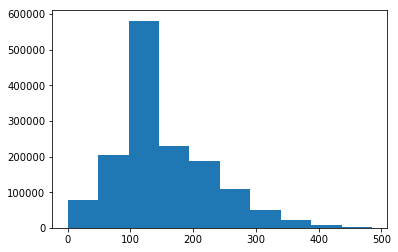

In [106]:
%matplotlib inline
plt.hist(dist_matrix.flatten())

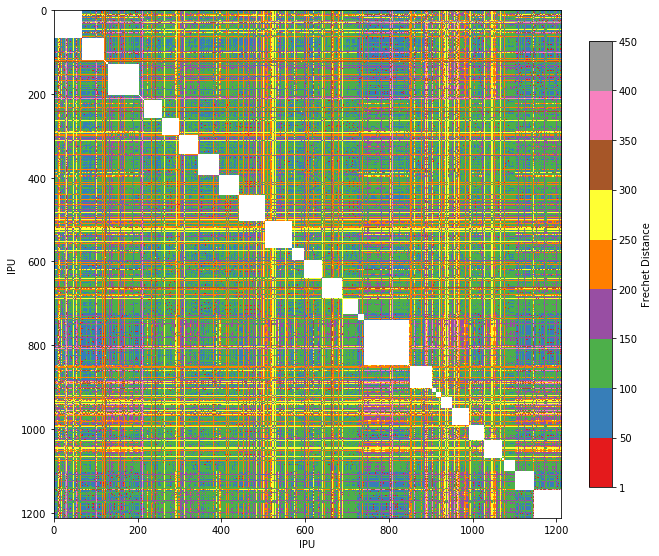

In [107]:
import matplotlib.cm as mcm
import matplotlib.colors as mcolors

norm = mcolors.Normalize(vmin=0.001)
bins = np.arange(0,500,50)
bins[0] = dist_matrix[dist_matrix>0].min()

cmap = mcm.viridis
cmap = mcm.Set1
#cmap = mcm.prism
norm = mcolors.BoundaryNorm(bins, cmap.N)
cmap.set_under("White")
fig, ax = plt.subplots(figsize=(10,10))
R=50
#clusterR = np.repeat(cluster_map, R, axis=0)
#sm = ax.imshow(clusterR, cmap=mcm.Greys)
sm = ax.imshow(dist_matrix, cmap=cmap, norm=norm)
ax.set_xlabel("IPU")
ax.set_ylabel("IPU")
#ax.set_yticks(np.arange(R/2, clusterR.shape[0],R))
#ax.set_yticklabels(clabels)
cb = fig.colorbar(sm, ax=ax, fraction=.04)
cb.set_label("Frechet Distance")
#ax.set_title("IPUs Assigned to Clusters Based on Frechet Distances")

In [ ]:
plt.hist(clusterR.flatten())

In [ ]:
len(cluster.labels_)

In [ ]:
cluster_labels = cluster.labels_

In [ ]:
print cluster_labels

In [ ]:
np.unique(cluster_labels)

In [ ]:
print cluster.labels_

In [ ]:
print min(cluster.labels_)
print max(cluster.labels_)

In [ ]:
length_cluster_labels = max(cluster.labels_)
cluster_labels = cluster.labels_

In [ ]:
print len(cluster_labels)

In [ ]:
max(cluster_labels)

In [ ]:
for i in range(len(cluster_labels)):
    if cluster_labels[i]==-1:
        cluster_labels[i]=27

## In which we try to create some visualizations of the cluster features
- Note (4/5): When I try to do this with my better distance matrix (halved, and then adding in all of the 0 features with the other half, this breaks - says that the first argument of bincount must be non-negative?  But it's 0, so I don't know what is happening here.

In [ ]:
np.bincount(cluster_labels)

In [ ]:
## code by Hannah to get the cluster labels
cluster_map = np.empty((cluster_labels.max()+1, dist_matrix.shape[1]))
clabels = np.unique(cluster_labels)
for label, count in zip(np.unique(cluster_labels), np.bincount(cluster_labels)):
       cluster_map[label:,:] = (dist_matrix[cluster_labels==label].mean(axis=0))

In [ ]:
## makes a heatmap of the ipu distances, and the clusters
import matplotlib.cm as mcm
import matplotlib.colors as mcolors

norm = mcolors.Normalize(vmin=0.001)
bins = np.arange(0,500,50)
bins[0] = clusterR[clusterR>0].min()

cmap = mcm.viridis
cmap = mcm.Set1
norm = mcolors.BoundaryNorm(bins, cmap.N)
cmap.set_under("White")
fig, ax = plt.subplots(figsize=(10,10))
R=50
clusterR = np.repeat(cluster_map, R, axis=0)
#sm = ax.imshow(clusterR, cmap=mcm.Greys)
sm = ax.imshow(clusterR, cmap=cmap, norm=norm)
ax.set_xlabel("IPU")
ax.set_ylabel("Clusters")
ax.set_yticks(np.arange(R/2, clusterR.shape[0],R))
ax.set_yticklabels(clabels)
cb = fig.colorbar(sm, ax=ax, fraction=.04)
cb.set_label("Frechet Distance")
ax.set_title("IPUs Assigned to Clusters Based on Frechet Distances")

#cb.set_ticks
#cb.set_ticklabels


In [ ]:
histo = np.bincount(cluster_labels)
print histo

In [ ]:
sum(histo)

### Notes (3/17/17)
- More than half of our data (53.60%) is being assigned to one cluster (in this case, cluster 13)
    - I would LOVE to see the labels of what's being assigned to that cluster...

In [ ]:
plt.figure()
plt.title("Number of IPUs assigned to each cluster")
plt.xlabel("Cluster number")
plt.ylabel("# of IPUs assigned to cluster")
plt.hist(cluster_labels, bins=5)

In [ ]:
print cluster_labels

### In which Pablo writes some code to organize feautres by speaker

In [ ]:
#This is the code that collects the speaker based feature vectors
#This will contain one feature vector per speaker
speakerFeatures=[]
# THis has the corresponding labels in the same order
speakerLabels=[]
clusternumber=max(cluster_labels)+1
for speakID in ipuID:
    full=0
    thisFeatVect=np.zeros(clusternumber)
    for ipu in ipuID[speakID]:
        #get the number for the IPU
        ident=ipuID[speakID][ipu]
        #get the cluster to which it belongs
        cluster=cluster_labels[ident]
        if cluster!=-1:
        #add 1 to the count of that cluster
            thisFeatVect[cluster-1]+=1
            full+=1
        else:
            thisFeatVect[24]+=1
            full+=1
        
    #normalize the counts
    normFeatVect=[]
    #print len(thisFeatVect)
    for item in thisFeatVect:
        item=(item*1.0)/full
        normFeatVect.append(item)
    speakerFeatures.append(normFeatVect)
    label=labels.iloc[speakID]["Language"]
    speakerLabels.append(label)

In [ ]:
###ONLY RUN THIS ONCE, DUMMY
print len(speakerLabels)
print len (speakerFeatures)
speakerFeatures=speakerFeatures[:-1]
speakerLabels = speakerLabels[:-1]


In [ ]:
len(speakerFeatures)

### NOTE: talk to Pablo about what this did / does

### In which I try to make some percentage features (percentage of ipus assigned to each cluster), and this feature doesn't work as well as using the cluster labels themselves?  Does that make sense?

In [ ]:
for i in cluster.labels_:
    print i

In [ ]:
percentage_out = []
for item in histo:
    percentage_out.append(item/float(histo.sum()))
    
print (percentage_out)

In [ ]:
## what percentage of ipus are in each cluster?  still not speaker based, I don't think there's a way to do that
percent_features = []
for i in range(len(percentage_out)):
    percentage = [percentage_out[i]]
    multiplier = histo[i]
    outlist = percentage*multiplier
    for item in outlist:
        percent_features.append(item)

print len(percent_features)
    
    

In [ ]:
ipu_percentages = [[feat] for feat in percent_features]

In [ ]:
x = [3]
print x*3

### A little bit of shit code below - notes from changing things to speaker based from before, but I can't really do that here, I don't think.
    

speaker_ipu_histograms = []
for speaker in all_ipu_coefs:
    scaled_ipu = scaler.transform(speaker)
    ipu_centers = cluster.predict(scaled_ipu)
    histo = np.bincount(ipu_centers, minlength=cluster.n_clusters) #set to to the clusteres we specificied before 
    #histo = np.bincount(ipu_centers, minlength=cluster.n_clusters) #set to to the clusteres we specificied before 
    speaker_ipu_histograms.append(histo / float(histo.sum()))

only_legendre = pd.DataFrame(speaker_ipu_histograms, columns=["cluster%d" % i for i in range(70)])
print only_legendre

### Below makes a feature vector using just the label of the cluster as a feature

In [ ]:
features = [ [feat] for feat in cluster_labels ]

In [ ]:
print features

In [ ]:
clf_labels = [IDtoLabel[i]for i in range(len(features))]

In [ ]:
print clf_labels

### Here, we make more visualizations of the data (useful histograms)

In [ ]:
langlab = zip(clf_labels, cluster_labels)
import collections
c = dict(collections.Counter(langlab))

In [ ]:
lcounts = {'English':np.zeros(clabels.max()+1), 'Mandarin':np.zeros(clabels.max()+1)}

In [ ]:
for ((lang, clust), count) in c.items():
    lcounts[lang][clust] = count
   

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(clabels, lcounts['English'], label="English")
ax.bar(clabels, lcounts['Mandarin'], bottom=lcounts['English'], label="Mandarin")
ax.set_xticks(clabels)
ax.legend()
ax.set_ylim((0,200))
ax.set_xlabel("Clusters")
ax.set_ylabel("Number of IPUs assigned to cluster")
ax.set_title("Number of IPUs Assigned to Clusters by Native Language")

In [ ]:
lcounts

In [ ]:
print len(features),len(clf_labels)

In [ ]:
print len(speakerFeatures[0])

In [ ]:
count = 0
thirteen_labels = []
for i in range(len(features)):
    if features[i][0]==13:
        labs = clf_labels[i]
        thirteen_labels.append(labs)
print thirteen_labels

#### More analysis, 3/17/17 
Holy crap.  Apart from cluster 13, each other cluster contains it in only IPUs with the same label.  Each other cluster is 100% labeled as English or labeled as Mandarin.  That is pretty damn cool.
What are we clustering by again?  IPU distance?  So the centers are distances, I think?  This is showing us a lot of solid, strong evidence that the distances are clusterable.  

53.6% of our data (so like 54% of our data / our distances) are being assigned to cluster 13.  Within cluster 13, English labels (ipu distances) make up 54.71% of that cluster, and Mandarin labels (ipu distances) make up 45.29% of that cluster.  Slight majority to English, but I bet that we could super cut this down.

What might this mean?
- This could mean that cluster 13 is where our distances are similar - they *are* all speaking English, after all
- This could also mean that this is where some of our distance computing errors might be (halving/doubling errors in computing distancs might make some of the distances between native and non-native language groups look more similar)
- This indicates that for slightly less than half of our data (approx 46%), the distances between native and non-native question contours are VERY SEPERABLE - different enough that they are getting assigned to different clusters, and these clusters are contain strictly within-label distances.  

## NOTE:
As of 3/17/17, IPU only cluster features give us 78% accuracy.  Just to verify this all still is working.  78% is not bad.

In [ ]:
eng_count = 0
man_count = 0
for item in thirteen_labels:
    if item[0] == "E":
        eng_count = eng_count+1
    else:
        man_count = man_count+1
        
eng_percent = float(eng_count)/len(thirteen_labels)
man_percent = float(man_count)/len(thirteen_labels)

print eng_percent
print man_percent

In [ ]:
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import ShuffleSplit

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}



#param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
#rom sklearn.svm import LinearSVC
grid_search = GridSearchCV(SVC(), param_grid, cv=10)

#X_train, X_test, y_train, y_test = train_test_split(features, clf_labels, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(features, clf_labels, random_state=0)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

In [ ]:
####print len(speakerFeatures)

In [ ]:
from sklearn.preprocessing 

In [ ]:
from sklearn.svm import SVC
classifier = SVC(C=0.1, gamma=1)
from sklearn.cross_validation import ShuffleSplit
from sklearn.cross_validation import cross_val_score
shuffle_split = ShuffleSplit(1213, n_iter= 10, test_size=.25, train_size=.75)
shuffle_score = cross_val_score(classifier, features, clf_labels, cv=shuffle_split)
print shuffle_score
print shuffle_score.mean()

In [ ]:
from sklearn.svm import SVC
classifier = SVC(C=1, gamma = 10)

X_train, X_test, y_train, y_test = train_test_split(features, clf_labels, random_state=0)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print score

In [ ]:
count_Eng = 0
count_Man = 0
total_Eng = 0
total_Man= 0
count_full = 0
total_instances=0
man_dist = []
eng_dist = []
full_dist = []
for i in range(len(dist_matrix)):
    for j in range(len(dist_matrix)):
        if IDtoLabel[i]==IDtoLabel[j]:
            if IDtoLabel[i]=="English":
                count_Eng+= dist_matrix[i][j]
                eng_dist.append(dist_matrix[i][j])
                total_Eng+=1
            else:
                count_Man+= dist_matrix[i][j]
                man_dist.append(dist_matrix[i][j])
                total_Man+=1
        count_full+= dist_matrix[i][j]
        total_instances+=1
        full_dist.append(dist_matrix[i][j])

        

In [ ]:
avg_dist_Eng = count_Eng/float(total_Eng)
avg_dist_Man = count_Man/float(total_Man)
avg_dist = count_full/float(total_instances)

## Summary of results (speaker-based features) (8/30)
Why haven't I written this into my paper yet?  When did I do this?  I have 0 memory of this but that isn't necessary surprising.  Saves me work, though!  I believe me.
- With an eps of 2.0, we get 23 clusters, which is very close to creating one cluster per speaker.  By creating a binary feature vector, assigning each speaker to a cluster, we do pretty badly - hovering around 50% accuracy.  
- Eps of 6.0, we do better - 8 clusters, 63% accurate.  But this is still not as good as just using the clusters as binary features on their own.


## (6/29) SUMMARY OF RESULTS (with all but 7 of the IPUs).
### NOTE: STILL MAY NOT BE TOTALLY CORRECT (check distance matrix and frechet distances, results are still suspiciously high)
NOTE:  This is with an eps of 2.0
- English IPUs are closer to each other than to random distances
- English IPUs are closer to each other than Mandarin IPUs
- Mandarin IPUs are also closer to each other than they are to random distances
- All of this is statistically significant

In [ ]:
print avg_dist_Eng
print avg_dist_Man
print avg_dist

In [ ]:
from scipy.stats import ttest_ind
p_eng = ttest_ind(eng_dist, full_dist)
p_man = ttest_ind(man_dist,full_dist)
print p_eng
print p_man

In [ ]:
distance_labels = pd.DataFrame

In [ ]:
type(labels.iloc[5])

count = 0
for item in distances.iterrows():
    speakerID =  item[1][1]
    if speakersID == count:
        lab = label.iloc[count][0]
        distance_labels.append(lab)
    else:

In [ ]:
cross_val_score?